<a href="https://colab.research.google.com/github/Naufall1/PCVK_Ganjil_2024/blob/main/PCVK_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Naufal Kurniawan ✅ <br>
Kelas : TI-3C [18] <br>
NIM   : 2241720214 <br>


# F. TUGAS PRAKTIKUM

## Buat Gamma Correction sesuai dengan petunjuk berikut

In [2]:
from google.colab import drive
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/female/female.tiff')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


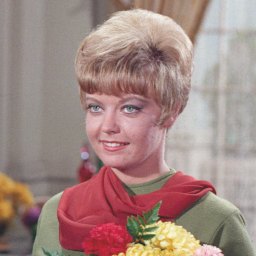

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')
gamma_corrention = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_corrention[x,y,c] = 255 * ((original[x,y,c] / 255) ** (1/gamma))

cv2_imshow(gamma_corrention)


## Buat Simulasi Image Depth

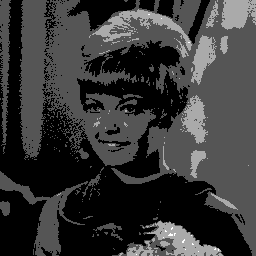

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/female/female.tiff',cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    # for c in range(original.shape[2]):
      depth_image[x,y] = round(original[x,y]/level)*level

cv2_imshow(depth_image)

## Buat modul Average Denoising

In [7]:
import glob
from math import log10, sqrt

galaxy = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/galaxy.jpg')

def getImage(num):
  return cv.imread(f'/content/drive/MyDrive/Colab Notebooks/PCVK/images/noises/{num}.jpg')

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# cv2_imshow(galaxy)
citra_di_average = [5,10,20,40,80,100]

for n in citra_di_average:
  print(f'Jumlah Citra di Average: {n}, Nilai PSNR: {PSNR(galaxy, getImage(n))}')
# print(PSNR(galaxy, getImage(5)))

Jumlah Citra di Average: 5, Nilai PSNR: 27.891683008592807
Jumlah Citra di Average: 10, Nilai PSNR: 27.887438234969686
Jumlah Citra di Average: 20, Nilai PSNR: 27.88091084402762
Jumlah Citra di Average: 40, Nilai PSNR: 27.900612307821447
Jumlah Citra di Average: 80, Nilai PSNR: 27.88139875781551
Jumlah Citra di Average: 100, Nilai PSNR: 27.88158322520698


Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.
> Averaging citra dengan jumlah antara 5 hingga 40 sudah memberikan hasil pengurangan noise yang optimal. Meningkatkan jumlah citra lebih dari 40 hanya sedikit meningkatkan PSNR, dan bahkan setelah 80 dan 100 citra, nilai PSNR hampir tidak berubah.

## Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

AND


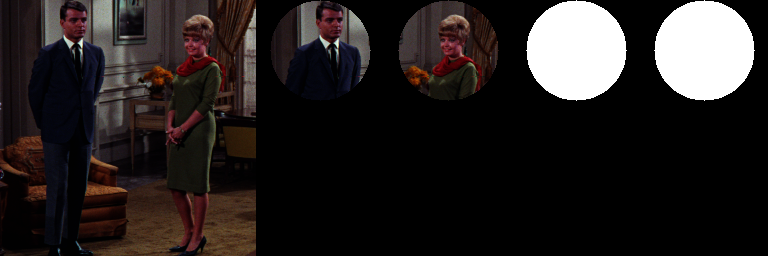

NOT


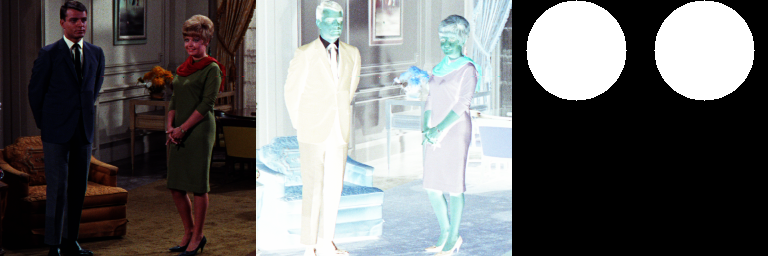

OR


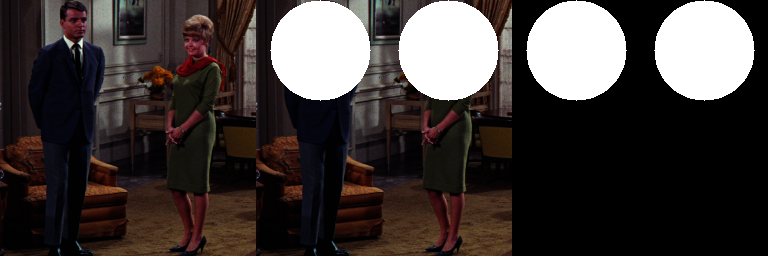

NAND


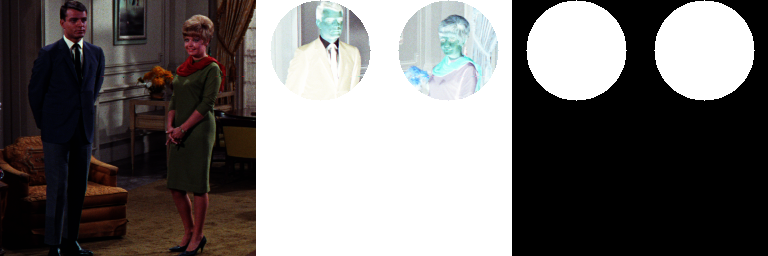

XOR


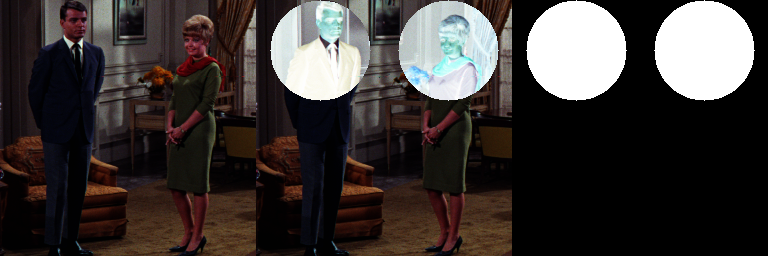

In [86]:
import matplotlib.pyplot as plt

couple = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/couple/couple.tiff')

h = couple.shape[0]
w = couple.shape[1]

mask = np.zeros((h, w), dtype=np.uint8)

cv.circle(mask, center=(((w//2)//2),50), radius=50, color=255, thickness=-1)
cv.circle(mask, center=(((w//2)//2)+w//2,50), radius=50, color=255, thickness=-1)

def imageMasking(operation):
  global couple
  res_image = np.zeros((h, w, 3))
  if operation == 'AND':
    for i in range(3):
      res_image[:,:,i] = cv.bitwise_and(couple[:,:,i], mask[:,:])
  elif operation == 'OR':
    for i in range(3):
      res_image[:,:,i] = cv.bitwise_or(couple[:,:,i], mask[:,:])
  elif operation == 'XOR':
    for i in range(3):
      res_image[:,:,i] = cv.bitwise_xor(couple[:,:,i], mask[:,:])
  elif operation == 'NOT':
    for i in range(3):
      res_image[:,:,i] = cv.bitwise_not(couple[:,:,i])
  elif operation == 'NAND':
      for i in range(3):
          and_image = cv.bitwise_and(couple[:, :, i], mask)  # Perform AND first
          res_image[:, :, i] = cv.bitwise_not(and_image)      # Perform NOT on AND result


  couple = couple.astype(np.uint8)
  res_image = res_image.astype(np.uint8)

  return cv.hconcat([couple, res_image, cv.cvtColor(mask, cv.COLOR_GRAY2BGR)])

print("AND")
cv2_imshow(imageMasking('AND'))
print("NOT")
cv2_imshow(imageMasking('NOT'))
print("OR")
cv2_imshow(imageMasking('OR'))
print("NAND")
cv2_imshow(imageMasking('NAND'))
print("XOR")
cv2_imshow(imageMasking('XOR'))


Tuliskan hasil analisa anda:
> - NOT menghasilkan citra negatif atau invers dari citra asli.
> - OR menggabungkan citra dan masker, memunculkan area terang dari citra asli.
> - AND mengisolasi area di dalam masker, menghilangkan area lain di luar masker.
> - NAND (diperkirakan) adalah kebalikan dari AND, mempertahankan bagian luar masker dan menghilangkan bagian dalamnya.
> - XOR menampilkan perbedaan antara citra dan masker, menghilangkan bagian yang tumpang tindih.